In [1]:
import sys
import os
import pandas as pd
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))
from utils.utils import load_and_prepare_data, evaluate_model_on_parquet
from configs.config import ELEVEN_LABS_FEATURES_PATH, ITW_DATASET_PATH, MODELS_PATH, FINAL_MODELS_PATH
import joblib

### Linear SVM

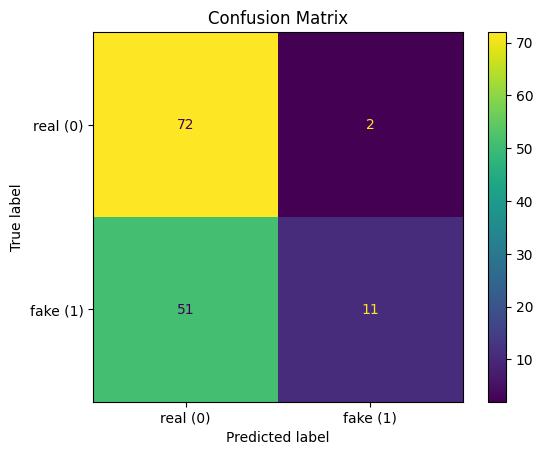

{'accuracy': 0.6102941176470589, 'precision': 0.8461538461538461, 'recall': 0.1774193548387097, 'f1_macro': 0.5121489001692048, 'roc_auc': 0.6706625980819529}


In [ ]:

best_model_path = os.path.join(MODELS_PATH, 'linear_svm','exp_20260131_215211', 'model.joblib')


model = joblib.load(best_model_path)


elev_test_data_path = os.path.join(ELEVEN_LABS_FEATURES_PATH, "eleven_labs_features_mean_20_128_256_128.parquet")
metrics, metadata_extra = evaluate_model_on_parquet(model, elev_test_data_path, plots=True)
print(metrics)

#### Test decission thresholds for linear svm

Threshold: -1.25
Precision (Fake): 0.649
Recall (Fake): 0.638
F1 (Fake): 0.622
Accuracy: 0.625
ROC AUC: 0.671


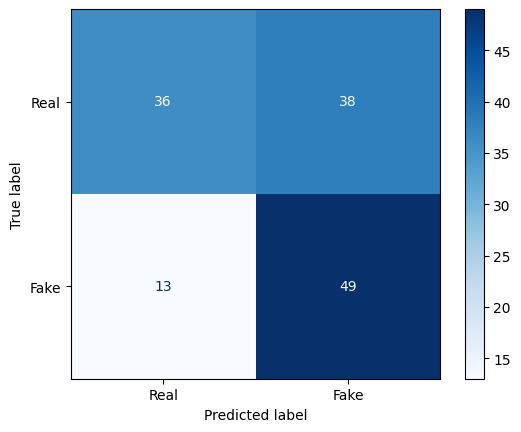

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import numpy as np
import joblib


best_model_path = os.path.join(MODELS_PATH, 'linear_svm','exp_20260131_215211', 'model.joblib')


model = joblib.load(best_model_path)
elev_test_data_path = os.path.join(ELEVEN_LABS_FEATURES_PATH,"eleven_labs_features_mean_20_128_256_128.parquet")
itw_test_data_path = os.path.join(ITW_DATASET_PATH, 'normalized_features',"itw_features_mean_20_128_256_128_trimmed_loudness_normalized.parquet")

_, _, X_itw, y_itw, X_elev, y_elev, _ = load_and_prepare_data(itw_test_data_path, itw_test_data_path, elev_test_data_path)
scores = model.decision_function(X_elev)
threshold = -1.25  # new threshold for class 1 (fake)
y_pred = (scores >= threshold).astype(int)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suppose y_pred are your new predictions with adjusted threshold
cm = confusion_matrix(y_elev, y_pred, labels=[0,1])  # 0 = real, 1 = fake

# Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
disp.plot(cmap="Blues")

precision = precision_score(y_elev, y_pred, average='macro')
recall = recall_score(y_elev, y_pred, average='macro')
f1 = f1_score(y_elev, y_pred, average='macro')
accuracy = accuracy_score(y_elev, y_pred)
roc_auc = roc_auc_score(y_elev, scores)  # use raw decision scores for ROC AUC

print(f"Threshold: {threshold}")
print(f"Precision (Fake): {precision:.3f}")
print(f"Recall (Fake): {recall:.3f}")
print(f"F1 (Fake): {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

### Logistic Regression

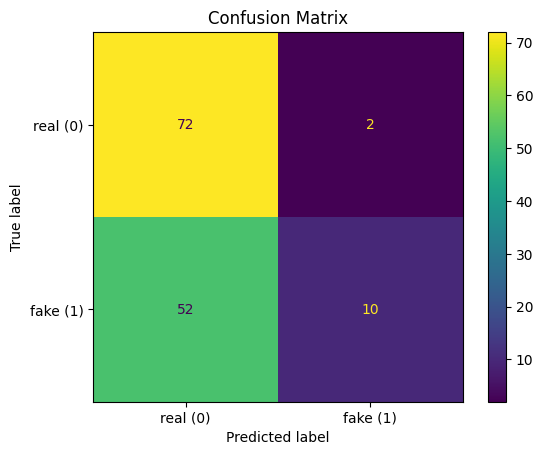

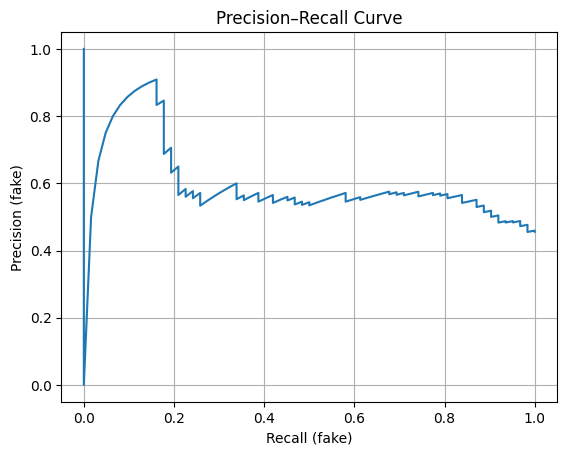

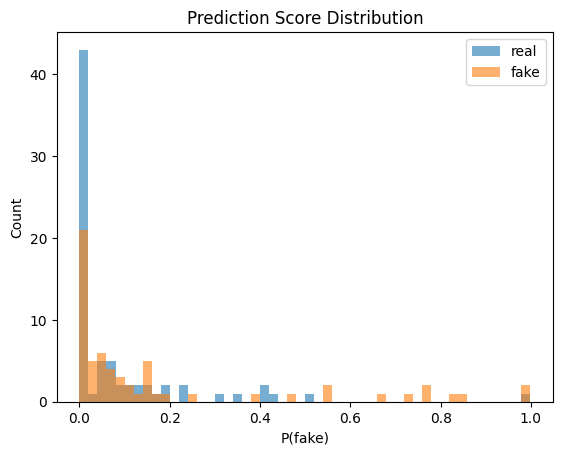

{'accuracy': 0.6029411764705882, 'precision': 0.8333333333333334, 'recall': 0.16129032258064516, 'f1_macro': 0.4987714987714988, 'roc_auc': 0.6540976460331299}


In [ ]:
best_model_path = os.path.join(MODELS_PATH, 'logistic_reg','exp_20260131_220429', 'model.joblib')

model = joblib.load(best_model_path)


elev_test_data_path = os.path.join(ELEVEN_LABS_FEATURES_PATH, "eleven_labs_features_mean_20_128_256_128.parquet")
metrics, metadata_extra = evaluate_model_on_parquet(model, elev_test_data_path, plots=True)
print(metrics)

Threshold: 0.1
Precision (Fake): 0.575
Recall (Fake): 0.564
F1 (Fake): 0.555
Accuracy: 0.581
ROC AUC: 0.567


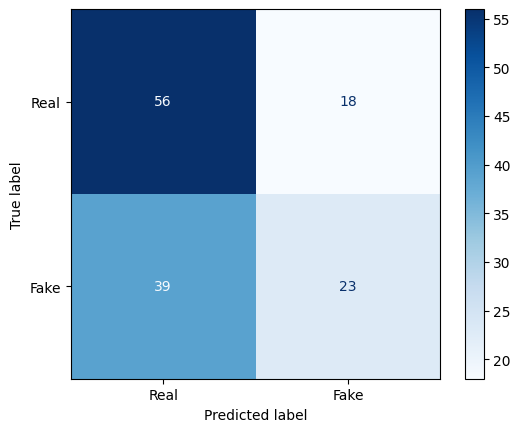

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import numpy as np
import joblib

best_model_path = os.path.join(MODELS_PATH, 'logistic_reg','exp_20260131_220429', 'model.joblib')

model = joblib.load(best_model_path)

elev_test_data_path = os.path.join(ELEVEN_LABS_FEATURES_PATH, "eleven_labs_features_mean_20_128_256_128.parquet")
itw_test_data_path = os.path.join(ITW_DATASET_PATH, 'normalized_features',"itw_features_mean_20_128_256_128_trimmed_loudness_normalized.parquet")

_, _, X_itw, y_itw, X_elev, y_elev, _ = load_and_prepare_data(itw_test_data_path, itw_test_data_path, elev_test_data_path)
scores = model.predict_proba(X_elev)
threshold = 0.1 # new threshold for class 1 (fake)

y_pred = (scores[:, 1] >= threshold).astype(int)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suppose y_pred are your new predictions with adjusted threshold
cm = confusion_matrix(y_elev, y_pred, labels=[0,1])  # 0 = real, 1 = fake

# Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
disp.plot(cmap="Blues")

precision = precision_score(y_elev, y_pred, average='macro')
recall = recall_score(y_elev, y_pred, average='macro')
f1 = f1_score(y_elev, y_pred, average='macro')
accuracy = accuracy_score(y_elev, y_pred)
roc_auc = roc_auc_score(y_elev, scores.argmax(axis=1))  # use raw decision scores for ROC AUC

print(f"Threshold: {threshold}")
print(f"Precision (Fake): {precision:.3f}")
print(f"Recall (Fake): {recall:.3f}")
print(f"F1 (Fake): {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

### RBF SVM

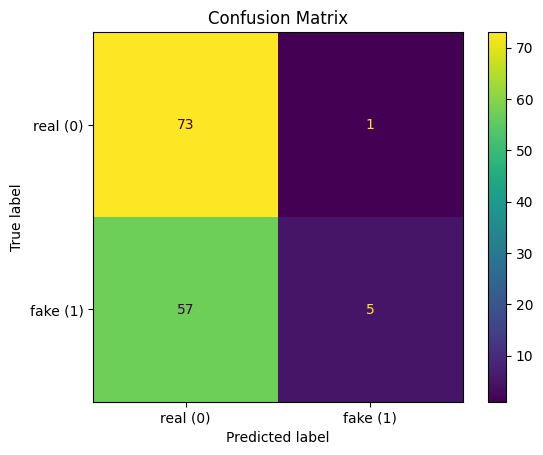

{'accuracy': 0.5735294117647058, 'precision': 0.8333333333333334, 'recall': 0.08064516129032258, 'f1_macro': 0.43137254901960786, 'roc_auc': 0.727332170880558}


In [ ]:
best_model_path = os.path.join(MODELS_PATH, 'rbf_svm','exp_20260131_233334', 'model.joblib')
model = joblib.load(best_model_path)


elev_test_data_path = os.path.join(ELEVEN_LABS_FEATURES_PATH, "eleven_labs_features_mean_20_128_256_128.parquet")
metrics, metadata_extra = evaluate_model_on_parquet(model, elev_test_data_path, plots=True)
print(metrics)

### Random Forest

c:\Users\Konstantinos\anaconda3\envs\audio_deepfake\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


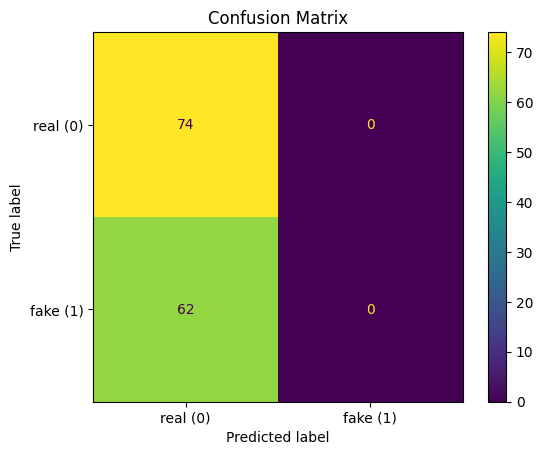

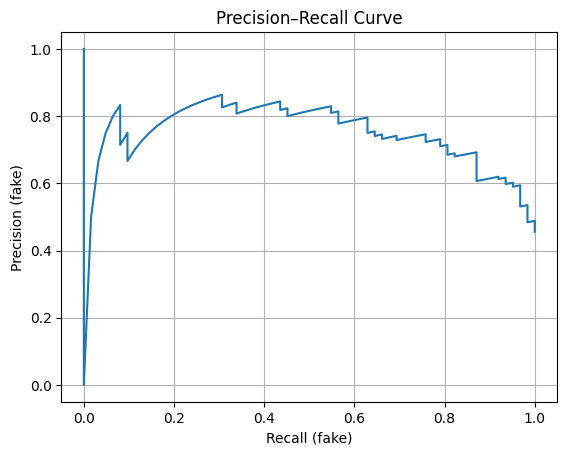

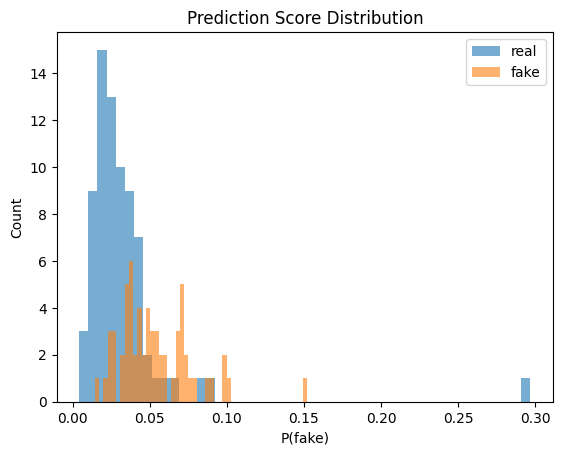

{'accuracy': 0.5441176470588235, 'precision': 0.0, 'recall': 0.0, 'f1_macro': 0.3523809523809524, 'roc_auc': 0.8275937227550131}


In [ ]:
best_model_path = os.path.join(MODELS_PATH, 'RF_grid','exp_20260202_135016', 'model.joblib')

model = joblib.load(best_model_path)


elev_test_data_path = os.path.join(ELEVEN_LABS_FEATURES_PATH, "eleven_labs_features_mean_20_128_256_128.parquet")
metrics, metadata_extra = evaluate_model_on_parquet(model, elev_test_data_path, plots=True)
print(metrics)

### XGBOOST

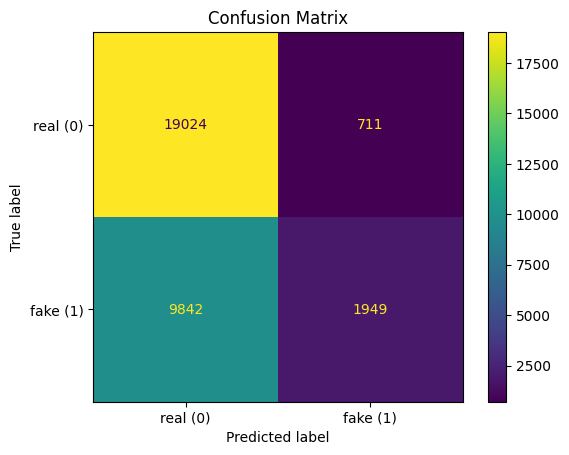

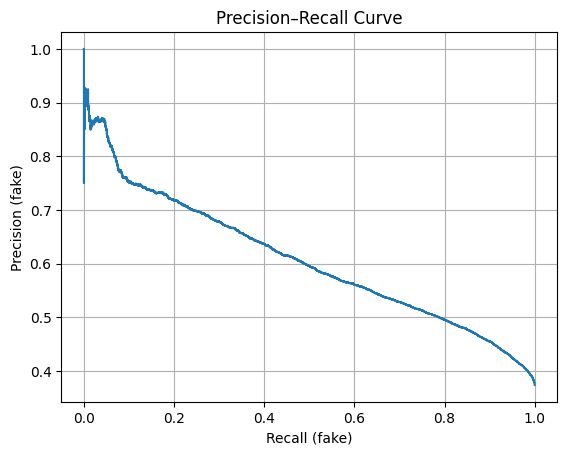

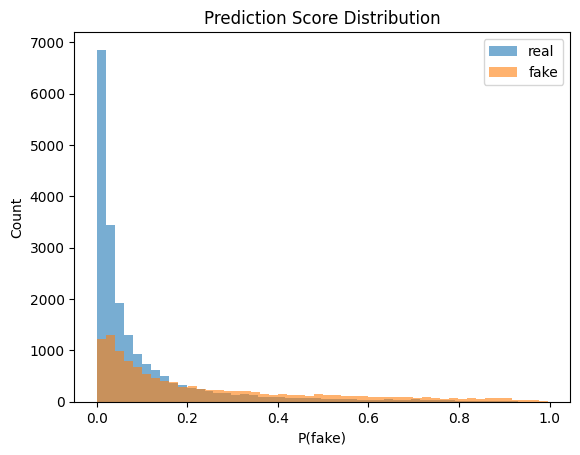

{'accuracy': 0.6652604199708178, 'precision': 0.6958760052282025, 'recall': 0.5646341009298487, 'f1_macro': 0.5263018342561242, 'roc_auc': 0.7282073213441684}


In [2]:
best_model_path = os.path.join(FINAL_MODELS_PATH, 'XGB', 'exp_20260208_160623', 'model.joblib')
model = joblib.load(best_model_path)

itw_test_data_path = os.path.join(ITW_DATASET_PATH, 'normalized_features',"itw_features_mean_20_128_256_128_trimmed_loudness_normalized.parquet")
elev_test_data_path = os.path.join(ELEVEN_LABS_FEATURES_PATH, "eleven_labs_features_mean_20_128_256_128.parquet")
metrics, metadata_extra = evaluate_model_on_parquet(model, itw_test_data_path, plots=True)
print(metrics)

#### No mel xgboost

In [3]:
elev_test_data_path = os.path.join(ELEVEN_LABS_FEATURES_PATH, "eleven_labs_features_mean_20_128_256_128.parquet")

elev_data = pd.read_parquet(elev_test_data_path)

elev_data_no_mel = elev_data.loc[:, ~elev_data.columns.str.startswith("mel_spectrogram")]

save_elev_no_mel_data_path = os.path.join(ELEVEN_LABS_FEATURES_PATH, "eleven_labs_features_mean_20_128_256_128_no_mel.parquet")
elev_data_no_mel.to_parquet(save_elev_no_mel_data_path)

itw_test_data_path = os.path.join(ITW_DATASET_PATH, 'normalized_features',"itw_features_mean_20_128_256_128_no_mel_trimmed_loudness_normalized.parquet")



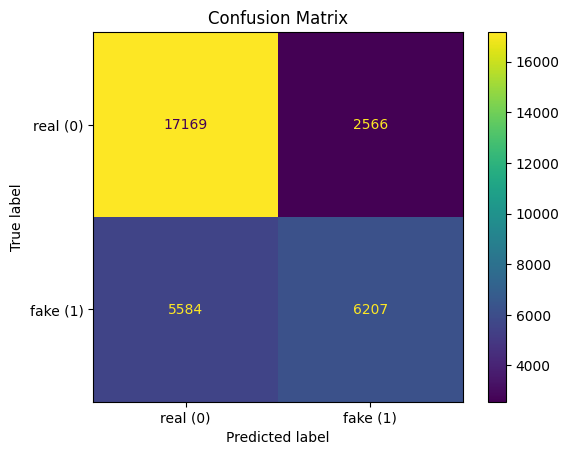

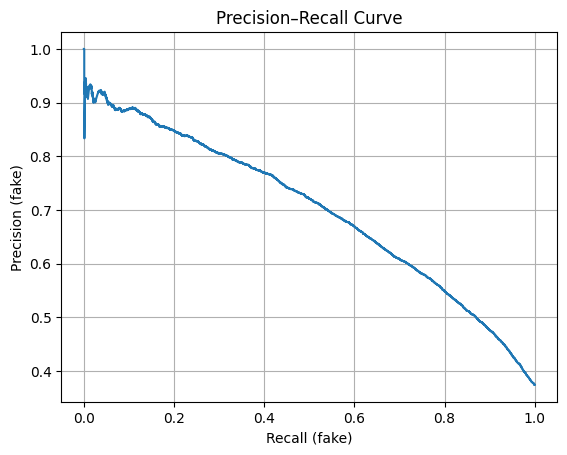

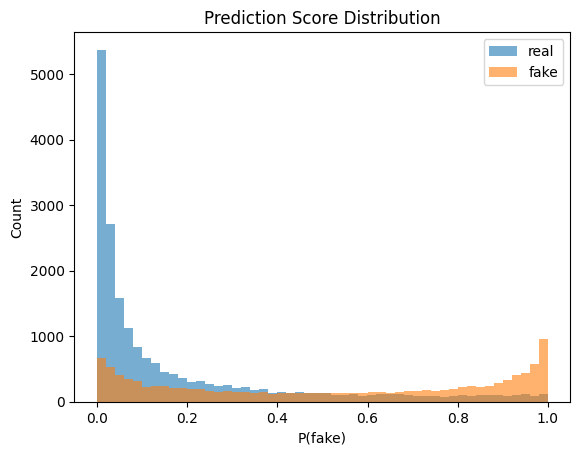

{'accuracy': 0.7414832201992007, 'precision': 0.7310467484809248, 'recall': 0.6981978263127135, 'f1_macro': 0.7059287305296238, 'roc_auc': 0.7857108124426275}


c:\Users\geon9\MSc\audio-deepfake-detection\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


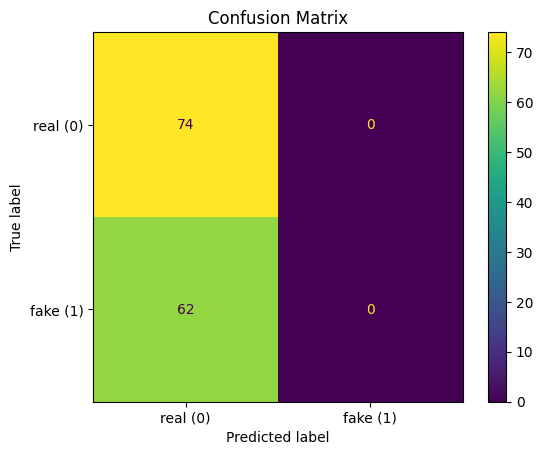

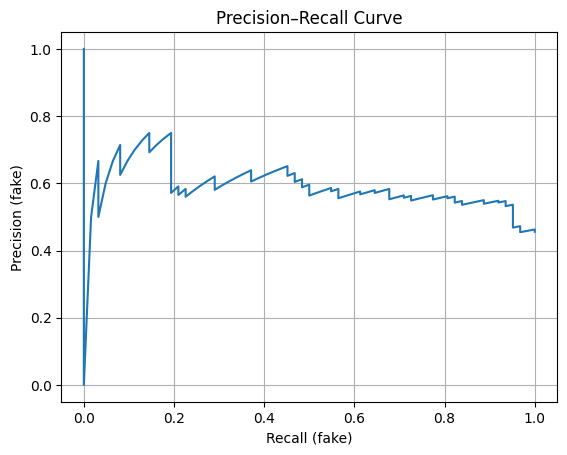

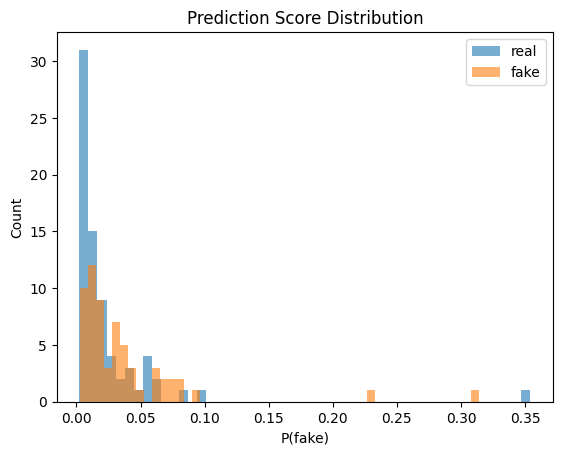

{'accuracy': 0.5441176470588235, 'precision': 0.27205882352941174, 'recall': 0.5, 'f1_macro': 0.3523809523809524, 'roc_auc': 0.6719703574542285}


In [5]:
best_model_path = os.path.join(FINAL_MODELS_PATH, 'XGB_NO_MEL','exp_20260208_034900', 'model.joblib')
model = joblib.load(best_model_path)
elev_test_data_path = save_elev_no_mel_data_path
metrics, metadata_extra = evaluate_model_on_parquet(model, itw_test_data_path, plots=True)
print(metrics)

eleven_merics, eleven_metadata = evaluate_model_on_parquet(model, elev_test_data_path, plots=True)
print(eleven_merics)